Create an “Academic performance” dataset of students and perform the following operations using Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.

In [7]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv("academic_performance.csv")
df.head()

,Student_ID,Math_Score,English_Score,Study_Hours
0,101,78.0,88.0,5
1,102,85.0,76.0,3
2,103,96.0,NaN,6
3,104,45.0,67.0,2
4,105,66.0,59.0,4


In [9]:
df.isnull().sum()

Student_ID       0
Math_Score       1
English_Score    2
Study_Hours      0
dtype: int64

In [10]:
# .copy() - Makes a shallow copy of the dataframe. If a variable is directly assigned a dataframe,
#           then any changes in the new dataframe variable will change the original dataframe too (implying passs by reference)
df1 = df.copy()
df1["Math_Score"] = df["Math_Score"].fillna(df["Math_Score"].mean())
df1["English_Score"] = df["English_Score"].fillna(value=df["English_Score"].mean())
print("Null values in df1: ")
display(df1.isnull().sum())
display(df1.shape)

# Other ways of removing null values
df2 = df.copy()
# df2 = df2.dropna() # or with paramter axis=1, we can directly remove columns which may have null values
df2 = df2.replace(to_replace=np.nan, value=0)
print("\nNull values in df2: ")
display(df2.isnull().sum())
display(df2.shape)

Null values in df1: 


Student_ID       0
Math_Score       0
English_Score    0
Study_Hours      0
dtype: int64

(30, 4)


Null values in df2: 


Student_ID       0
Math_Score       0
English_Score    0
Study_Hours      0
dtype: int64

(30, 4)

Student_ID       0
Math_Score       0
English_Score    0
Study_Hours      0
dtype: int64

Student_ID       30
Math_Score       29
English_Score    23
Study_Hours       7
dtype: int64


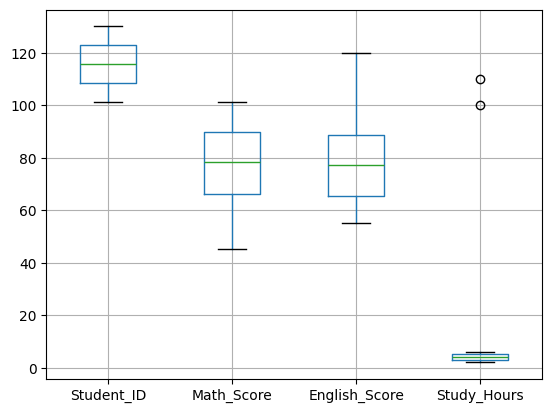


Outliers: 


,Student_ID,Math_Score,English_Score,Study_Hours
7,108,101.0,94.0,100
28,129,89.0,90.0,110



New df: 


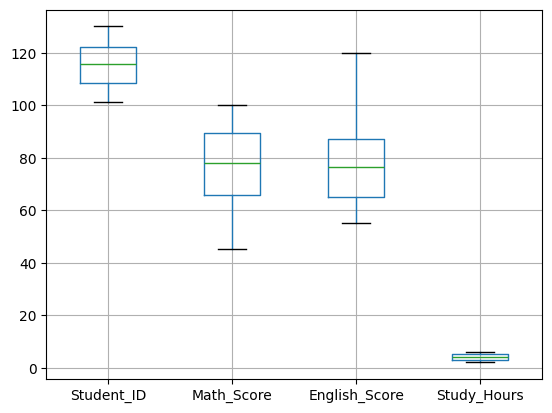

In [30]:
# Removing outliers using boxplot
import matplotlib.pyplot as plt

df1.boxplot()
# df1[["Study_Hours"]].boxplot()
plt.show()

outliers = df1[df1["Study_Hours"] > 20]
print("\nOutliers: ")
display(outliers)

print("\nNew df: ")
new_df = df1.copy()
new_df = new_df[new_df["Study_Hours"] < 20]
new_df.boxplot()
plt.show()

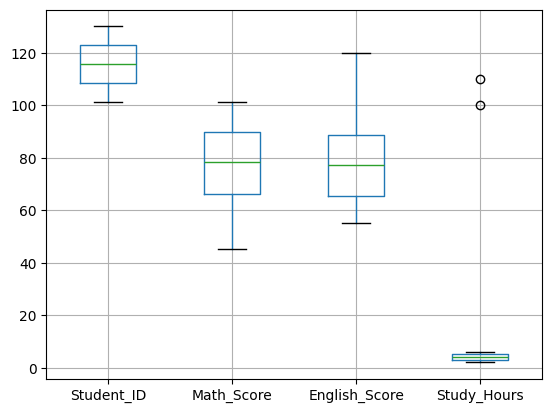


Outliers: 


,Student_ID,Math_Score,English_Score,Study_Hours
7,108,101.0,94.0,100
28,129,89.0,90.0,110



New df: 


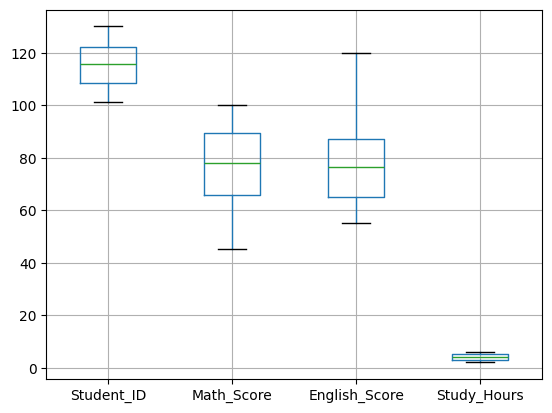

In [33]:
# Removing outliers using Inter Quartile Range (IQR)
import matplotlib.pyplot as plt

df1.boxplot()
plt.show()

Q1 = df1["Study_Hours"].quantile(0.25)
Q3 = df1["Study_Hours"].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = df1[(df1["Study_Hours"] < lower_bound) | (df1["Study_Hours"] > upper_bound)]
print("\nOutliers: ")
display(outliers)

print("\nNew df: ")
new_df = df1.copy()
new_df = new_df[(new_df["Study_Hours"] > lower_bound) & (new_df["Study_Hours"] < upper_bound)]
new_df.boxplot()
plt.show()

Logarithmic Normalization


,Student_ID,Math_Score,English_Score,Study_Hours
0,101,0.986087,0.994244,0.706395
1,102,0.991922,0.984300,0.625800
2,103,0.999985,0.985551,0.732569
3,104,0.945681,0.975466,0.554618
4,105,0.974394,0.966273,0.672503
5,106,0.985692,0.991922,0.706395
6,107,0.994996,0.997191,0.732569
8,109,0.980544,1.014191,0.625800
9,110,0.973301,0.980544,0.672503
10,111,0.994244,0.995738,0.706395


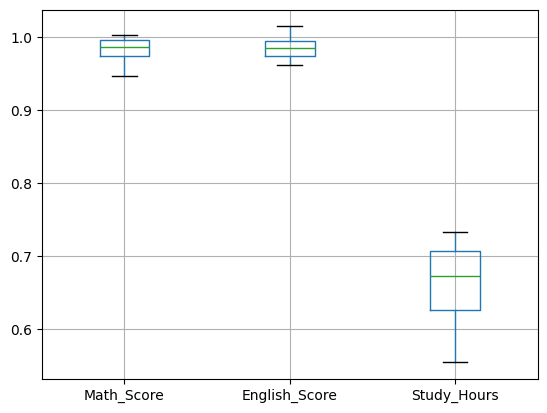




MinMax Normalization


,Student_ID,Math_Score,English_Score,Study_Hours
0,101,0.703522,0.618246,0.841524
1,102,0.807485,0.430764,0.378796
2,103,0.952136,0.454244,1.000000
3,104,0.000000,0.265764,0.000000
4,105,0.496995,0.095597,0.642382
5,106,0.696495,0.574310,0.841524
6,107,0.862493,0.674178,1.000000
8,109,0.605310,1.000000,0.378796
9,110,0.477820,0.360424,0.642382
10,111,0.849016,0.646575,0.841524


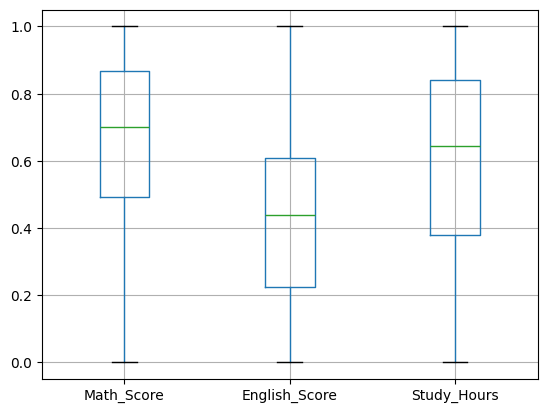

In [42]:
cols = ['Math_Score','English_Score','Study_Hours']

# Normalization

# Logarithmic normalization
print("Logarithmic Normalization")
log_df = new_df.copy()
log_df[cols] = np.log1p(log_df[cols])  # log1p handles 0 safely
display(log_df) # Normalized columns
log_df.boxplot(cols)
plt.show()
# Logarithmic normalization is used to reduce right-skewness in the data

print("\n\n")

# MinMax normalzation
print("MinMax Normalization")
min_max_df = new_df.copy()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
min_max_df[cols] = scaler.fit_transform(min_max_df[cols])
display(min_max_df) # Normalized columns
min_max_df.boxplot(cols)
plt.show()